2018-12-4
NumPy：提供許多數運算，包含許多矩陣的運算

SciPy：許多工程運算，像是線性代數，微積分等等

Pandas：處理表格和矩陣



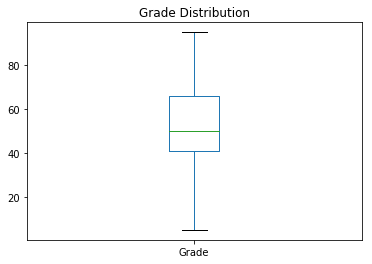

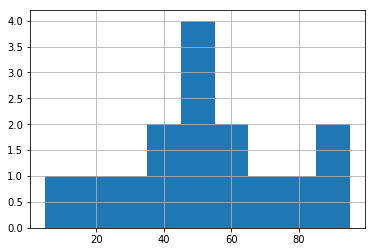

           Grade
count  15.000000
mean   51.533333
std    24.642781
min     5.000000
25%    41.000000
50%    50.000000
75%    66.000000
max    95.000000
median: 50.0


In [1]:
#盒鬚圖 1

%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

#dataframe 
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

plt.figure()
df['Grade'].plot( kind='box', title='Grade Distribution')  #kind=box => 盒鬚圖
plt.figure()
df['Grade'].hist(bins=9)  #histogram 9格
plt.show()
print(df.describe())  #文字描述各項數值
print('median: ' + str(df['Grade'].median()))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


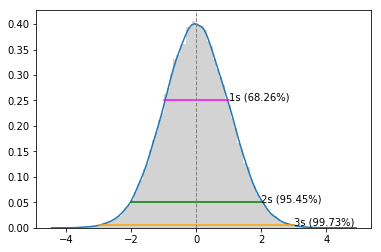

In [2]:
#高斯分布

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Create a random standard normal distribution  # 1~10萬的random值存到df
df = pd.DataFrame(np.random.randn(100000, 1), columns=['Grade'])

# Plot the distribution as a histogram with a density curve
grade = df['Grade']
density = stats.gaussian_kde(grade)  #density 總合為 1
n, x, _ = plt.hist(grade, color='lightgrey', normed=True, bins=100)  
plt.plot(x, density(x))

# Get the mean and standard deviation
s = df['Grade'].std()   #標準差  平均數給值
m = df['Grade'].mean()

# Annotate 1 stdev #一個標準差
x1 = [m-s, m+s]
y1 = [0.25, 0.25]
plt.plot(x1,y1, color='magenta')
plt.annotate('1s (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs #二個標準差
x2 = [m-(s*2), m+(s*2)]
y2 = [0.05, 0.05]
plt.plot(x2,y2, color='green')
plt.annotate('2s (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs #三個標準差
x3 = [m-(s*3), m+(s*3)]
y3 = [0.005, 0.005]
plt.plot(x3,y3, color='orange')
plt.annotate('3s (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(grade.mean(), color='grey', linestyle='dashed', linewidth=1)

plt.show()



[0.23730469 0.39550781 0.26367187 0.08789062 0.01464844 0.00097656]


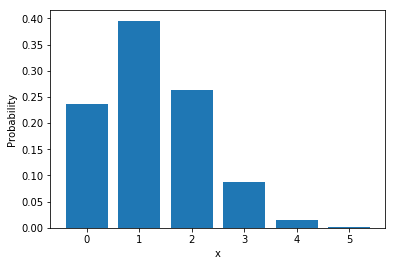

range(0, 6)
[0.23730469 0.39550781 0.26367187 0.08789062 0.01464844 0.00097656]


In [8]:
#高斯_右偏圖(right-skewed)
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html
# pmf(x, n, p)	Probability mass function.

# The probability mass function for binom is:

# binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)
# for k in {0, 1,..., n}.

# binom takes n and p as shape parameters.
# https://www.youtube.com/watch?v=ynBUPA67a3k

%matplotlib inline
from scipy.stats import binom
from matplotlib import pyplot as plt
import numpy as np

n = 5
p = 0.25
x = np.array(range(0, n+1))
# range(0, 5)
# =>0 1 2 3 4 

prob = np.array([binom.pmf(k, n, p) for k in x])  #probability mass function   (PDF)=> probability density function
print(prob)
# Set up the graph
plt.xlabel('x')
plt.ylabel('Probability')
plt.bar(x, prob)
plt.show()
print(range(0, 6))
print(prob)

In [4]:

"""
Input : arr[] = {1, 2, 3, 4, 5, 6, 7, 8}     #概念範例
Output : 3.76435
        = (1 * 2 * 3 * 4 * 5 * 6 * 7 * 8)1/8
        = 403201/8
        = 3.76435

Input : arr[] = {15, 12, 13, 19, 10}
Output : 13.447
        = (15 * 12 * 13 * 19 * 10)1/5
        = 4446001/5
        = 13.477
"""
import math 
  

def geometricMean(arr, n) :   # 自己製作function 幾何平均 回傳float value
      
    # declare product variable and 
    # initialize it to 1. 
    product = 1
      
    # Compute the product of all the 
    # elements in the array. 
    for i in range(0,n) : 
        product = product * arr[i] 
   
    # compute geometric mean through  
    # formula pow(product, 1/n) and 
    # return the value to main function. 
    gm = (float)(math.pow(product, (1 / n))) 
    return (float)(gm) 
      
      
# Driver function 
arr = [ 1, 2, 3, 4, 5, 6, 7, 8] 
n = len(arr) 
  
# to print 6 digits after decimal 
print ('{0:.6f}'.format(geometricMean(arr, n))) 


3.764351


In [5]:
import scipy.stats   #套件

gm = scipy.stats.mstats.gmean([5, 10, 15])

print('Geometric Mean', gm)

(5+10+15) / 3




Geometric Mean 9.085602964160701


10.0

In [6]:
# 自己製作function geometric mean rate

def geomean_return(*numbers):
    pprr = 0
    product = 1
    answer = 0
    percent_return = 0
    for i in numbers:
        pprr = i + 1
        product *= pprr
        answer = product ** (1/len(numbers)) - 1
        percent_return = answer * 100
    return 'answer = {}, percent return = {}'.format(answer, round(percent_return, 4))
    
geomean_return(.8, .166667, .4285)

'answer = 0.44222566976873345, percent return = 44.2226'

In [7]:
# geometric rate of return
#add 1 to all number and substrate 1 in the end

import scipy.stats

# geometric mean rate of return using scipy  #計算geometric mean rate
# add return relative (per period return relative) and then substract 1
gm1 = scipy.stats.mstats.gmean([.8+1, .166667+1, .4285+1])-1
print('scipy Geometic Mean 1 -', gm1*100)



scipy Geometic Mean 1 - 44.222566976873345
